<a href="https://colab.research.google.com/github/cgarciav/base-de-datos-HCC/blob/master/selecci%C3%B3n_caracter%C3%ADsticas_lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
#%load_ext tensorboard    Carga de Tensorboard (opcional)
# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf #libreria de google que permite hacer deeplearning
from tensorflow import keras #libreria de alto nivel
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import random
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
path='/content/drive/My Drive/analisis de datos/hcc-data-complete-balanced.csv'
df=pd.read_csv(path)

In [4]:
df

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,67,137,15.0,0,1,1,1.53,95.0,13.7,106.6,4.9,99.00,3.40,2.10,34,41,183,150,7.1,0.70,1,3.5,0.50,52.5,37.0,856.0,1
1,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,62,0,0.0,0,1,1,1.24,2.6,10.3,83.0,6.1,1.71,3.90,0.80,11,28,77,120,7.0,0.58,1,1.8,0.85,32.0,10.0,18.0,1
2,1,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,78,50,50.0,2,1,2,0.96,5.8,8.9,79.8,8.4,472.00,3.30,0.40,58,68,202,109,7.0,2.10,5,13.0,0.10,28.0,6.0,16.0,1
3,1,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,77,40,30.0,0,1,1,0.95,2440.0,13.4,97.1,9.0,279.00,3.70,0.40,16,64,94,174,8.1,1.11,2,15.7,0.20,131.0,78.0,1316.0,0
4,1,1,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,76,100,30.0,0,1,1,0.94,49.0,14.3,95.1,6.4,199.00,4.10,0.70,147,306,173,109,6.9,1.80,1,9.0,0.10,59.0,15.0,22.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,70,17,7.0,0,1,1,1.33,502.6,11.1,102.8,6.9,90846.80,3.18,2.67,102,126,389,117,7.0,5.25,2,8.8,1.35,73.3,46.0,873.0,0
200,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,80,107,13.0,3,2,2,1.35,2353.7,12.2,95.2,6.7,332033.67,3.26,1.07,24,56,229,231,6.5,0.78,2,7.6,1.04,69.3,23.0,70.0,0
201,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,80,86,0.0,3,1,1,1.55,23.4,10.2,96.3,7.4,195.76,2.93,3.22,66,68,469,304,7.0,1.07,1,12.0,1.57,71.2,29.0,106.0,0
202,1,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,1,0,1,1,74,124,0.0,3,2,1,1.33,6.1,13.0,86.0,1118.4,101884.41,3.31,1.45,29,48,203,197,7.2,1.08,5,3.0,0.63,94.4,83.0,859.0,0


In [0]:
#df.iloc[:, 49]

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [0]:
x = df.drop(['Class'], axis=1) 
y=df['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y,stratify=y, test_size=0.2, random_state=42)


In [0]:
#normalizamos datos
from sklearn import preprocessing

scaler=preprocessing.StandardScaler().fit(x_train)

x_train_transformed=scaler.transform(x_train)
x_test_transformed=scaler.transform(x_test)


In [9]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.regularizers import l1, l2

Using TensorFlow backend.


LASSO estimation with stochastic gradient descent

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.02).fit(x_train_transformed, y_train) 
weights = model_lasso.coef_
weights



array([ 0.        , -0.08579645,  0.00844937,  0.04391023,  0.        ,
        0.        , -0.00337197,  0.        ,  0.04305369,  0.06130049,
       -0.07581976,  0.        ,  0.01450481,  0.0811083 , -0.01997184,
       -0.02126875,  0.05476432, -0.        ,  0.        ,  0.        ,
       -0.05004397, -0.05801444,  0.04118865, -0.03644335,  0.        ,
       -0.06293918, -0.04526923,  0.        , -0.02537996, -0.06646211,
        0.02089624,  0.03933601,  0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.02182132, -0.05568553, -0.        ,
       -0.05713377, -0.02541851, -0.        , -0.        , -0.06014868,
       -0.        , -0.        , -0.00862095, -0.10078755])

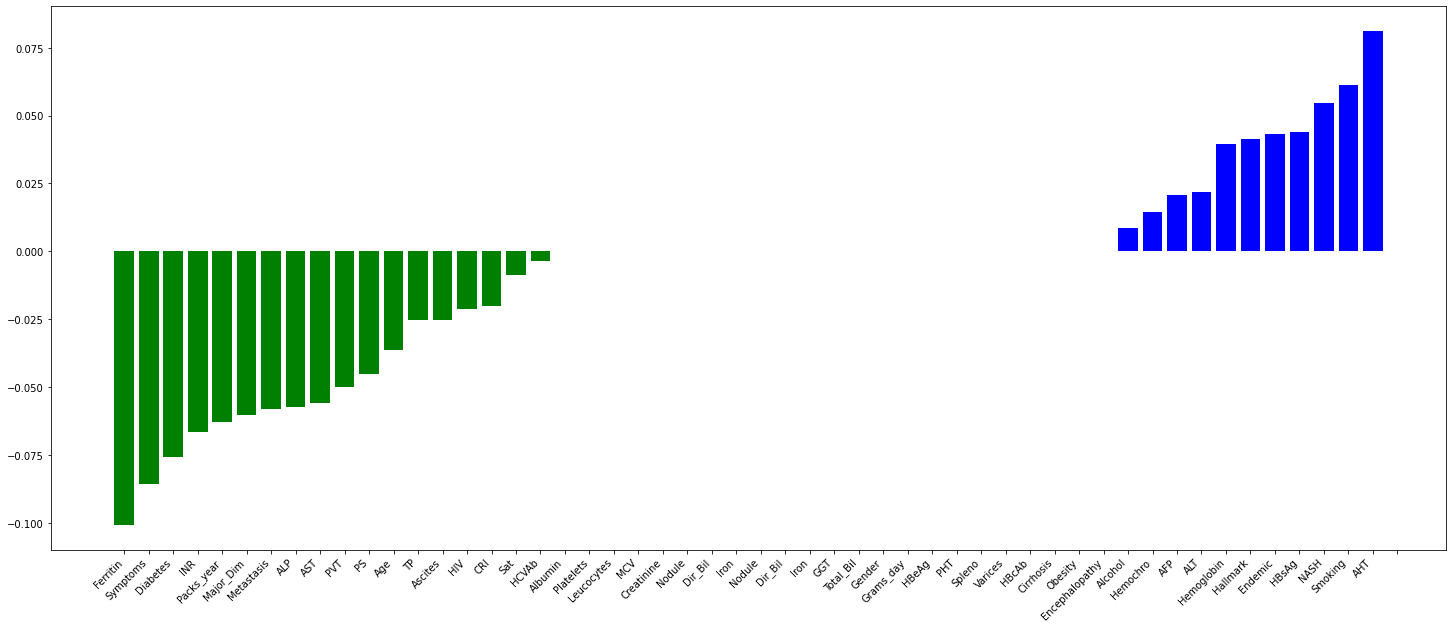

In [11]:


def feature_plot(classifier, feature_names, top_features=26):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 plt.figure(figsize=(25,10))
 colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1 + 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
 plt.show()



model_lasso = Lasso(alpha=0.02).fit(x_train_transformed, y_train) 
feature_plot(model_lasso, df.drop(['Class'], axis = 1).columns.values)

In [0]:
x2=df[['Alcohol','Hemoglobin','AFP','Hemochro','Hallmark','Endemic','Smoking','HBsAg','ALT','AHT', 'NASH' ]] 
y2=df['Class']

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2,stratify=y2, test_size=0.2, random_state=42)


In [0]:
#normalizamos datos
from sklearn import preprocessing

scaler=preprocessing.StandardScaler().fit(x_train2)

x_train_transf=scaler.transform(x_train2)
x_test_transf=scaler.transform(x_test2)
y_train_transf=y_train2
y_test_transf=y_test2

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import roc_auc_score

model_lasso = Lasso(alpha=0.1).fit(x_train_transf, y_train_transf)

In [15]:
from sklearn.metrics import classification_report

y_pred=model_lasso.predict(x_test_transf)

print ('AUC:', roc_auc_score(y_test_transf,y_pred))


AUC: 0.7226190476190476
